In [1]:
%load_ext autoreload
%autoreload 2

## eCadherin datasets

In [3]:
import pandas as pd
offsets = pd.DataFrame(columns=['embryoID', 'offset']).set_index('embryoID')
offsets.loc[202001261800, 'offset'] = 18
offsets.loc[202001280915, 'offset'] = 18
offsets.loc[202001281430, 'offset'] = 18
offsets.loc[202001282000, 'offset'] = 18
offsets.loc[202001271040, 'offset'] = 18
offsets.loc[202001281800, 'offset'] = 18
offsets.to_csv('../Public/WT/ECad-GFP/morphodynamic_offsets.csv')

/Users/jcolen/Documents/drosophila_morphogenesis/Public/WT/ECad-GFP/202001280915
/Users/jcolen/Documents/drosophila_morphogenesis/Public/WT/ECad-GFP/202001282000
/Users/jcolen/Documents/drosophila_morphogenesis/Public/WT/ECad-GFP/202001271040
/Users/jcolen/Documents/drosophila_morphogenesis/Public/WT/ECad-GFP/202001261800
/Users/jcolen/Documents/drosophila_morphogenesis/Public/WT/ECad-GFP/202001281430
/Users/jcolen/Documents/drosophila_morphogenesis/Public/WT/ECad-GFP/202001281800


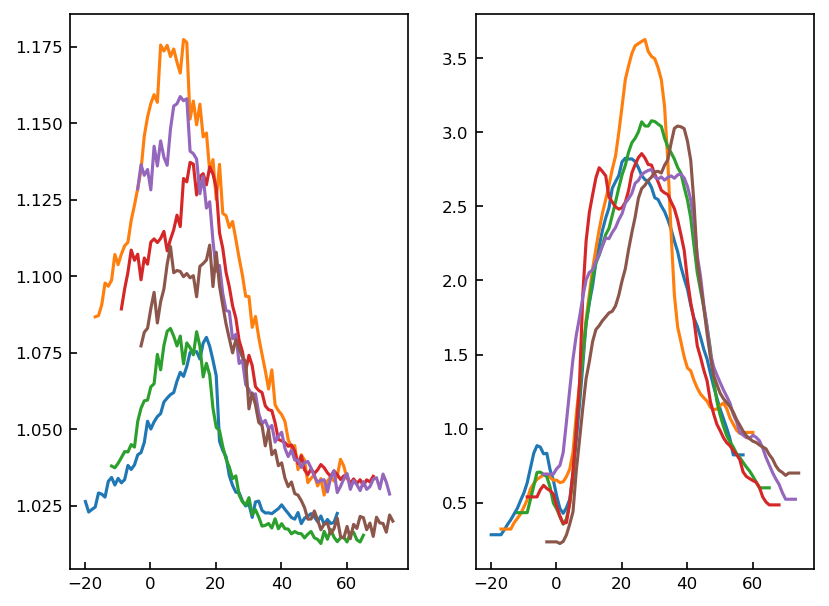

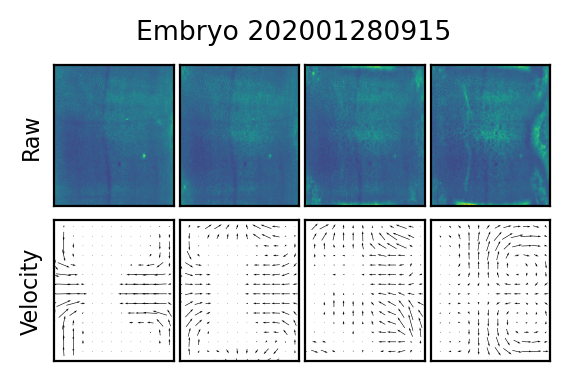

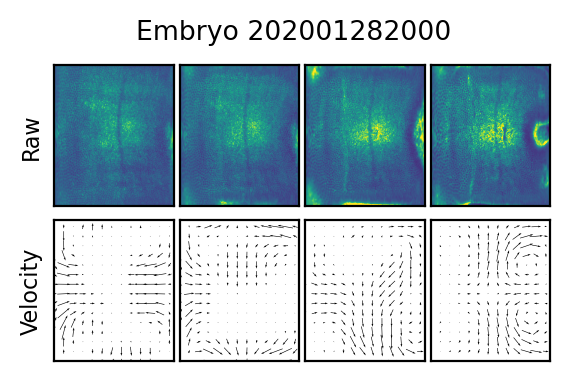

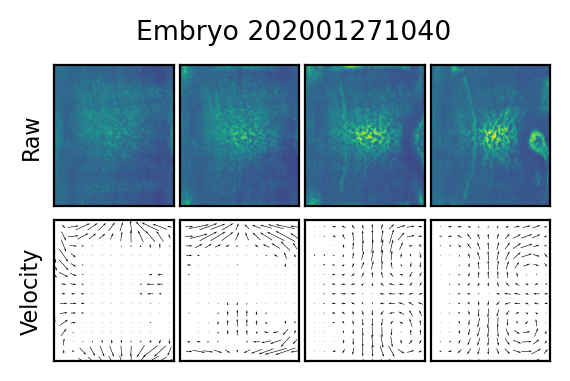

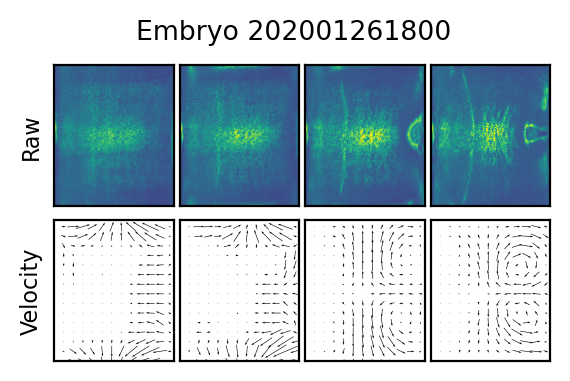

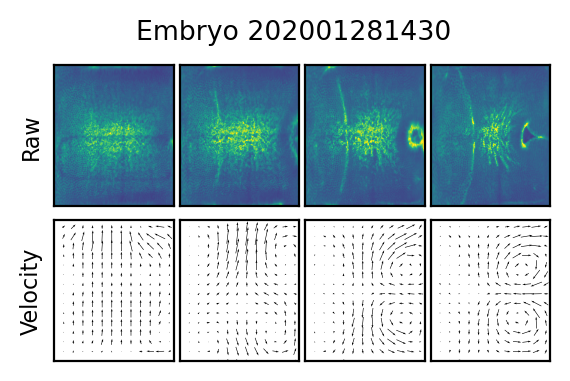

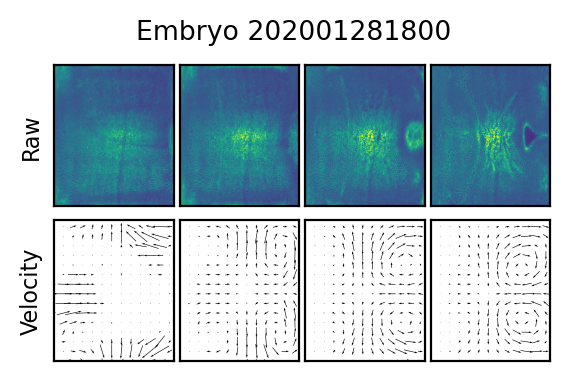

In [4]:
import pandas as pd
import glob
import os
from morphogenesis.plot_utils import *

folder = '../Public/WT/ECad-GFP'
df = pd.read_csv(f'{folder}/dynamic_index.csv')
offsets = pd.read_csv(f'{folder}/morphodynamic_offsets.csv', index_col='embryoID')
N = 4
dt = 10

fig1, ax1 = plt.subplots(1, 2, dpi=150)

for path in df.folder.unique():
    print(path)
    
    fig, ax = plt.subplots(2, N, figsize=(N*0.8, 2), sharex=True, sharey=True, dpi=200)
    
    raw = np.load(f'{path}/raw2D.npy', mmap_mode='r')
    vel = np.load(f'{path}/velocity2D.npy', mmap_mode='r')
    
    eId = int(os.path.basename(path))
    t = df.loc[df.embryoID == eId, 'time'] - offsets.loc[int(os.path.basename(path)), 'offset']
    ax1[0].plot(t, np.mean(raw, axis=(1,2)))
    ax1[1].plot(t, np.mean(np.linalg.norm(vel, axis=1), axis=(1,2)))
    
    for i in range(N):
        plot_scalar(ax[0, i], raw[i*dt], cmap='viridis', vmin=0., vmax=3)
        plot_vector(ax[1, i], vel[i*dt], skip=16)
        
    fig.suptitle(f'Embryo {os.path.basename(path)}')
    ax[0, 0].set_ylabel('Raw')
    ax[1, 0].set_ylabel('Velocity')
    ax[0, 0].set_xlim([ap_min, ap_max])
    ax[0, 0].set_ylim([dv_min, dv_max])

    fig.subplots_adjust(hspace=0.01, wspace=0.05)

## Myosin datasets (with comparison to Gustafson paper)

In [5]:
offsets = pd.DataFrame(columns=['embryoID', 'offset']).set_index('embryoID')

# Offsets for Sqh-GFP imaged embryos were provided by Nikolas Claussen
offsets.loc[202006261115, 'offset'] = -1
offsets.loc[202007011145, 'offset'] = 21
offsets.loc[202007081130, 'offset'] = 13
offsets.loc[202007091200, 'offset'] = 21
offsets.loc[202008131005, 'offset'] = 10
offsets.loc[202009041145, 'offset'] = 11
offsets.to_csv('../Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/morphodynamic_offsets.csv')

[202006261115 202007011145 202007081130 202007091200 202008131005
 202009041145]
/Users/jcolen/Documents/drosophila_morphogenesis/Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/202006261115
/Users/jcolen/Documents/drosophila_morphogenesis/Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/202007011145
/Users/jcolen/Documents/drosophila_morphogenesis/Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/202007081130
/Users/jcolen/Documents/drosophila_morphogenesis/Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/202007091200
/Users/jcolen/Documents/drosophila_morphogenesis/Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/202008131005
/Users/jcolen/Documents/drosophila_morphogenesis/Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP/202009041145


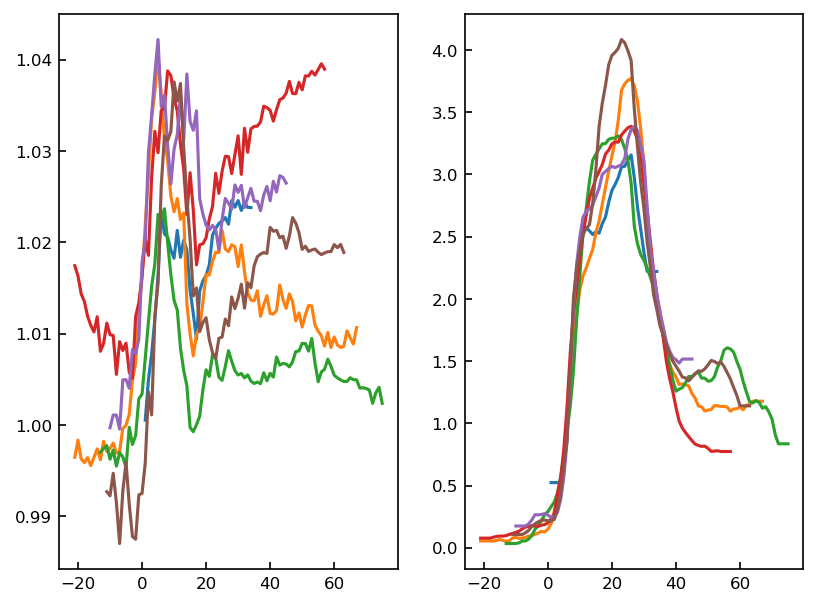

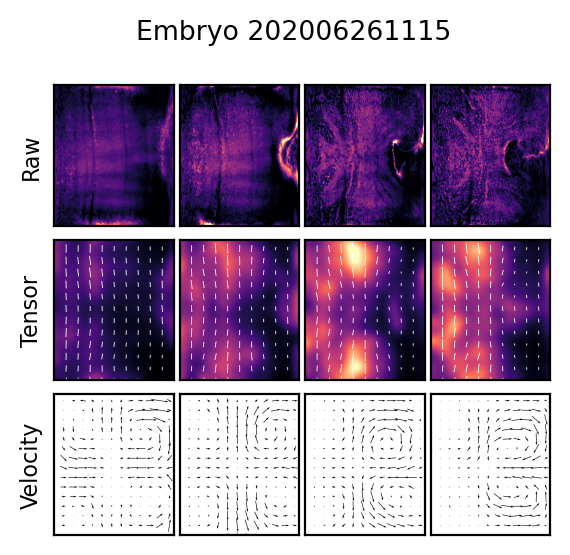

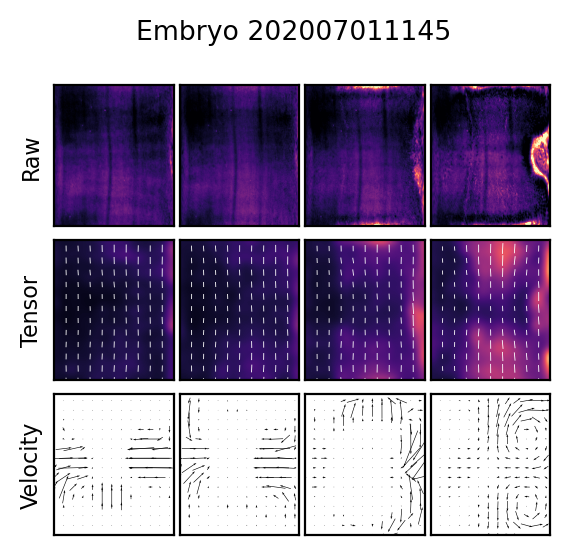

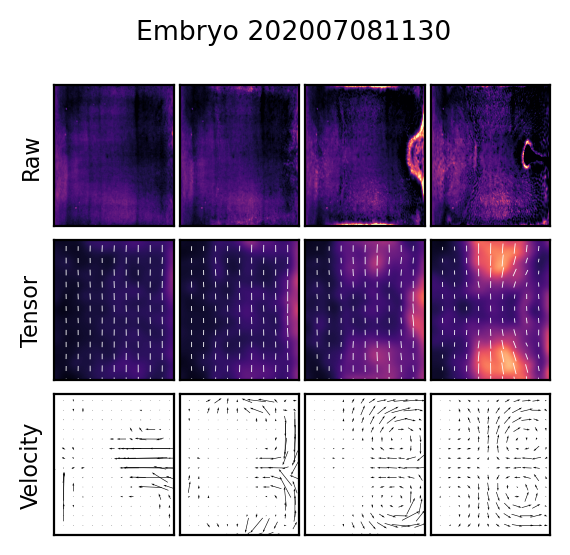

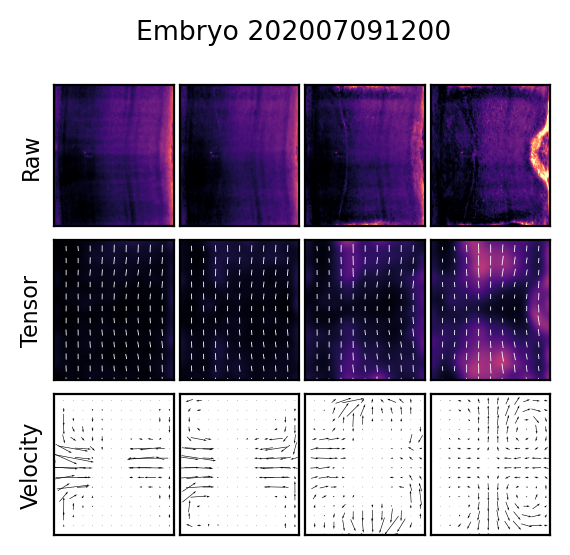

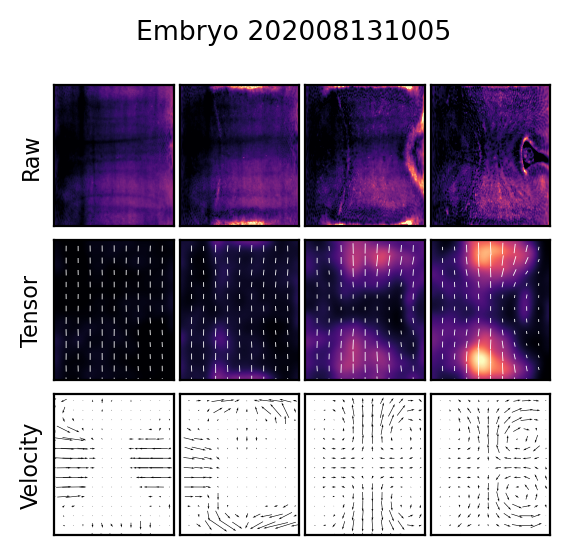

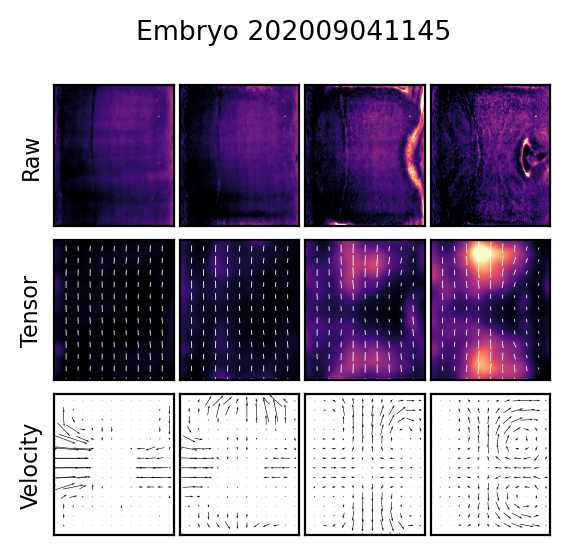

In [6]:
import pandas as pd
import glob
import os
from morphogenesis.plot_utils import *

folder = '../Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP'
df = pd.read_csv(f'{folder}/dynamic_index.csv')
offsets = pd.read_csv(f'{folder}/morphodynamic_offsets.csv', index_col='embryoID')
N = 4
dt = 10

fig1, ax1 = plt.subplots(1, 2, dpi=150)
print(df.embryoID.unique())
for path in df.folder.unique():
    print(path)
    
    fig, ax = plt.subplots(3, N, figsize=(N*0.8, 3), sharex=True, sharey=True, dpi=200)
    
    raw = np.load(f'{path}/raw2D.npy', mmap_mode='r')
    ten = np.load(f'{path}/tensor2D.npy', mmap_mode='r')
    vel = np.load(f'{path}/velocity2D.npy', mmap_mode='r')

    
    eId = int(os.path.basename(path))
    t = np.arange(len(vel)) - offsets.loc[int(os.path.basename(path)), 'offset']
    ax1[0].plot(t, np.mean(raw, axis=(1,2)))
    ax1[1].plot(t, np.mean(np.linalg.norm(vel, axis=1), axis=(1,2)))
    
    for i in range(N):
        plot_scalar(ax[0, i], raw[i*dt], cmap='magma', vmin=0.8, vmax=2)
        plot_tensor(ax[1, i], ten[i*dt], cmap='magma', vmin=0.05, vmax=0.3)
        plot_vector(ax[2, i], vel[i*dt], skip=16)
        
    fig.suptitle(f'Embryo {os.path.basename(path)}')
    ax[0, 0].set_ylabel('Raw')
    ax[1, 0].set_ylabel('Tensor')
    ax[2, 0].set_ylabel('Velocity')
    ax[0, 0].set_xlim([ap_min, ap_max])
    ax[0, 0].set_ylim([dv_min, dv_max])

    fig.subplots_adjust(hspace=0.01, wspace=0.05)

### Compare to reference data from Nikolas

(57, 256, 218, 2, 2)
(79, 2, 2, 236, 200)


NameError: name 'plot_tensor2D' is not defined

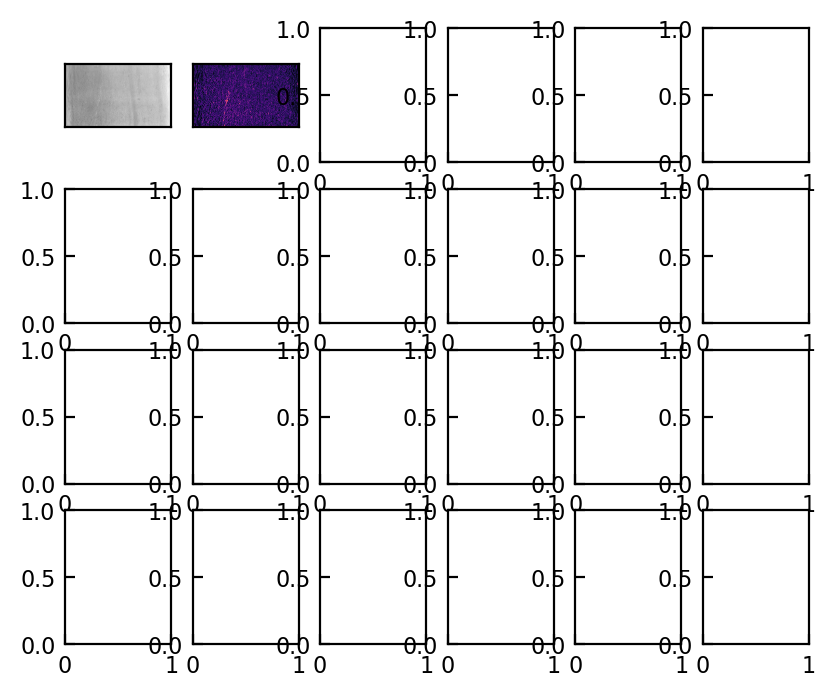

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import glob
from morphogenesis.plot_utils import *
plt.rcParams['image.cmap'] = 'inferno'
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['figure.titlesize'] = 8
plt.rcParams['axes.titlesize'] = 6
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['figure.dpi'] = 200


nikolas_dir = '../Public/nikolas_data/WT myosin datasets for Jonathan/'
jonathan_dir = '../Public/Halo_Hetero_Twist[ey53]_Hetero/Sqh-GFP'

eIds = ['202007091200', '202009041145']
offsets = [10, 0]

dt = 10
N = 4

for i, eId in enumerate(eIds):
    fig, ax = plt.subplots(N, 6, figsize=(6*0.8, N))

    raw_nik = Image.open(glob.glob(os.path.join(nikolas_dir, 'individual movies', eId+'_twistPlus_*.tif'))[0])
    cyt_nik = Image.open(os.path.join(nikolas_dir, 'individual movies', eId+'_cytosolic.tif'))
    ten_nik = np.load(os.path.join(nikolas_dir, 'individual movies', eId+ '_myosin.npy'), mmap_mode='r')
    
    raw_jon = np.load(os.path.join(jonathan_dir, eId, 'raw2D.npy'), mmap_mode='r')
    cyt_jon = np.load(os.path.join(jonathan_dir, eId, 'cyt2D.npy'), mmap_mode='r')
    ten_jon = np.load(os.path.join(jonathan_dir, eId, 'tensor2D.npy'), mmap_mode='r')
    
    cmin = np.median(cyt_jon) - np.std(cyt_jon)
    cmax = cmin + 5 * np.std(cyt_jon)
    
    dev = ten_jon - np.einsum('tkkyx,ij->tijyx', ten_jon, np.eye(2))
    mnorm = np.linalg.norm(dev, axis=(1, 2))
    mmin = np.min(mnorm)
    mmax = np.max(mnorm)
    
    offset = offsets[i]

    print(ten_nik.shape)
    print(ten_jon.shape)
    for i in range(N):
        raw_nik.seek(i*dt)
        raw = np.array(raw_nik)
        plot_scalar(ax[i, 0], raw, cmap='Greys_r', vmax_std=10)
        
        cyt_nik.seek(i*dt)
        cyt = np.array(cyt_nik)
        plot_scalar(ax[i, 1], cyt, cmap='magma', vmax_std=1)
        
        tensor = ten_nik[dt*i].transpose(2, 3, 0, 1).copy()
        tensor = tensor[::-1, ::-1, :, :] #YX ordering
        tensor[0, 1] *= -1 #origin lower
        tensor[1, 0] *= -1 #origin lower
        plot_tensor(ax[i, 2], tensor)
        
        raw = raw_jon[i*dt+offset]
        plot_scalar(ax[i, 3], raw, cmap='Greys_r', vmax_std=10)
        
        cyt = cyt_jon[i*dt+offset]
        plot_scalar(ax[i, 4], cyt, cmap='magma', vmin=cmin, vmax=cmax)

        tensor = ten_jon[i*dt+offset]
        plot_tensor(ax[i, 5], tensor, vmin=mmin, vmax=mmax)
        
        
    fig.text(0.5, 1.3, 'Nikolas', 
             fontsize=6,
             va='bottom', ha='center', 
             transform=ax[0, 1].transAxes)
    
    fig.text(0.5, 1.3, 'Jonathan', 
         fontsize=6,
         va='bottom', ha='center', 
         transform=ax[0, 4].transAxes)
        
    fig.suptitle('Embryo ' + eId)
    ax[0, 0].set_title('Raw')
    ax[0, 1].set_title('Cytosolic')
    ax[0, 2].set_title('Tensor')
    
    ax[0, 3].set_title('Raw')
    ax[0, 4].set_title('Cytosolic')
    ax[0, 5].set_title('Tensor')

    for a in ax.flatten():
        a.set(xlim=[ap_min, ap_max], ylim=[dv_min, dv_max])

    fig.subplots_adjust(hspace=0.01, wspace=0.05)


## Compare dataset time alignment

In [ ]:
from morphogenesis.dataset import *
transform = Reshape2DField()
cad_dataset = AtlasDataset('WT', 'ECad-GFP', 'velocity2D', transform=transform, tmin=None, tmax=None)
sqh_dataset = AtlasDataset('Halo_Hetero_Twist[ey53]_Hetero', 'Sqh-GFP', 'velocity2D', transform=transform, drop_time=True, tmin=None, tmax=None)

100%|██████████| 6/6 [00:00<00:00, 6479.36it/s]


Sqh-GFP
ECad-GFP


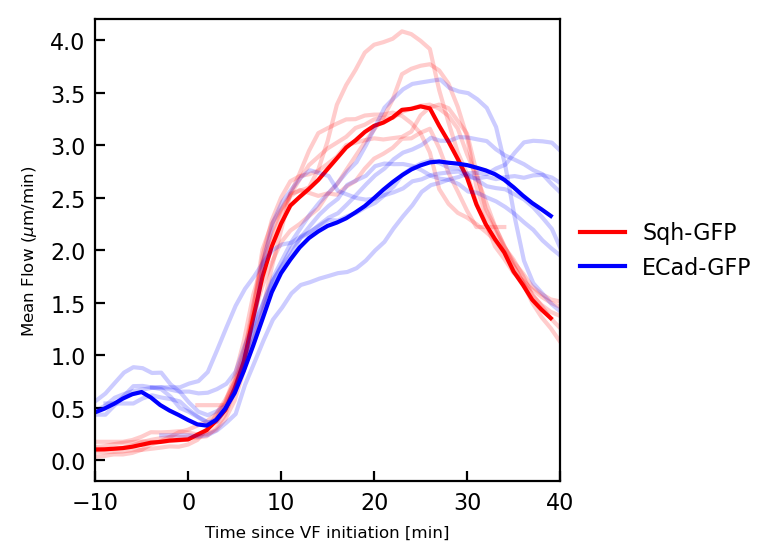

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, dpi=200, figsize=(3, 3))
ax.set_ylabel('Mean Flow ($\\mu$m/min)')
ax.set_ylim([-0.2, 4.2])
ax.set_xlabel('Time since VF initiation [min]')

for dataset, color in zip([sqh_dataset, cad_dataset], 
                          ['red', 'blue']):
    for eId in dataset.df.embryoID.unique():
        values = dataset.values[eId]
        time = dataset.df.loc[dataset.df.embryoID == eId, 'time']
        norm = np.linalg.norm(values.reshape([values.shape[0], -1, *values.shape[-2:]]), axis=1).mean(axis=(1, 2))
        ax.plot(time, norm, color=color, alpha=0.2)

    label = '_'.join(os.path.basename(dataset.label).split('_')[:-1])
    print(label)
    try:
        ensemble_v = np.load(os.path.join(dataset.path, 'ensemble', 'velocity2D.npy'))
        norm = np.linalg.norm(ensemble_v, axis=(1)).mean(axis=(1, 2))
        ensemble_t = np.load(os.path.join(dataset.path, 'ensemble', 't.npy'))
        ax.plot(ensemble_t, norm, color=color, label=label)
    except:
        print('No ensemble found for this dataset')

ax.legend(loc='center left', bbox_to_anchor=[1, 0.5], framealpha=0)

ax.set_xlim([-10, 40])
        
fig.subplots_adjust(hspace=0)